<a href="https://colab.research.google.com/github/RJL08/Sistemas-de-aprendizaje-autm-tico/blob/main/Ejercicio_Bayes8Enero_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio Machine Learning: Gaussian Naive Bayes

## ¿Comprar o alquilar casa? ¿Qué me conviene?

En este ejercicio, usaremos el algoritmo de Gaussian Naive Bayes para decidir si nos conviene Alguilar o Comprar una casa

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import ConfusionMatrixDisplay


## Importemos Datos de entrada

In [17]:

# REFERENCIAS:
# ingresos y gastos son mensuales de 1 personas o 2 si están casados.
# trabajo: 0-sin trabajo 1-autonomo 2-asalariado 3-empresario 4-Autonomos 5-Asalariados 6-Autonomo y Asalariado 7-Empresario y Autonomo 8 Empresarios o empresario y autónomo
# estado_civil: 0-soltero 1-casado 2-divorciado
# hijos: Cantidad de hijos menores (no trabajan)
# comprar: 0-mejor alquilar 1-Comprar casa
# hipoteca fija a 30 años con interes

#importamos csv
df = pd.read_csv('sample_data/comprar_alquilar.csv')

In [18]:
#Visualizamos los datos
df.head()

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
0,6000,1000,0,600,50000,400000,0,2,2,1
1,6745,944,123,429,43240,636897,1,3,6,0
2,6455,1033,98,795,57463,321779,2,1,8,1
3,7098,1278,15,254,54506,660933,0,0,3,0
4,6167,863,223,520,41512,348932,0,0,3,1


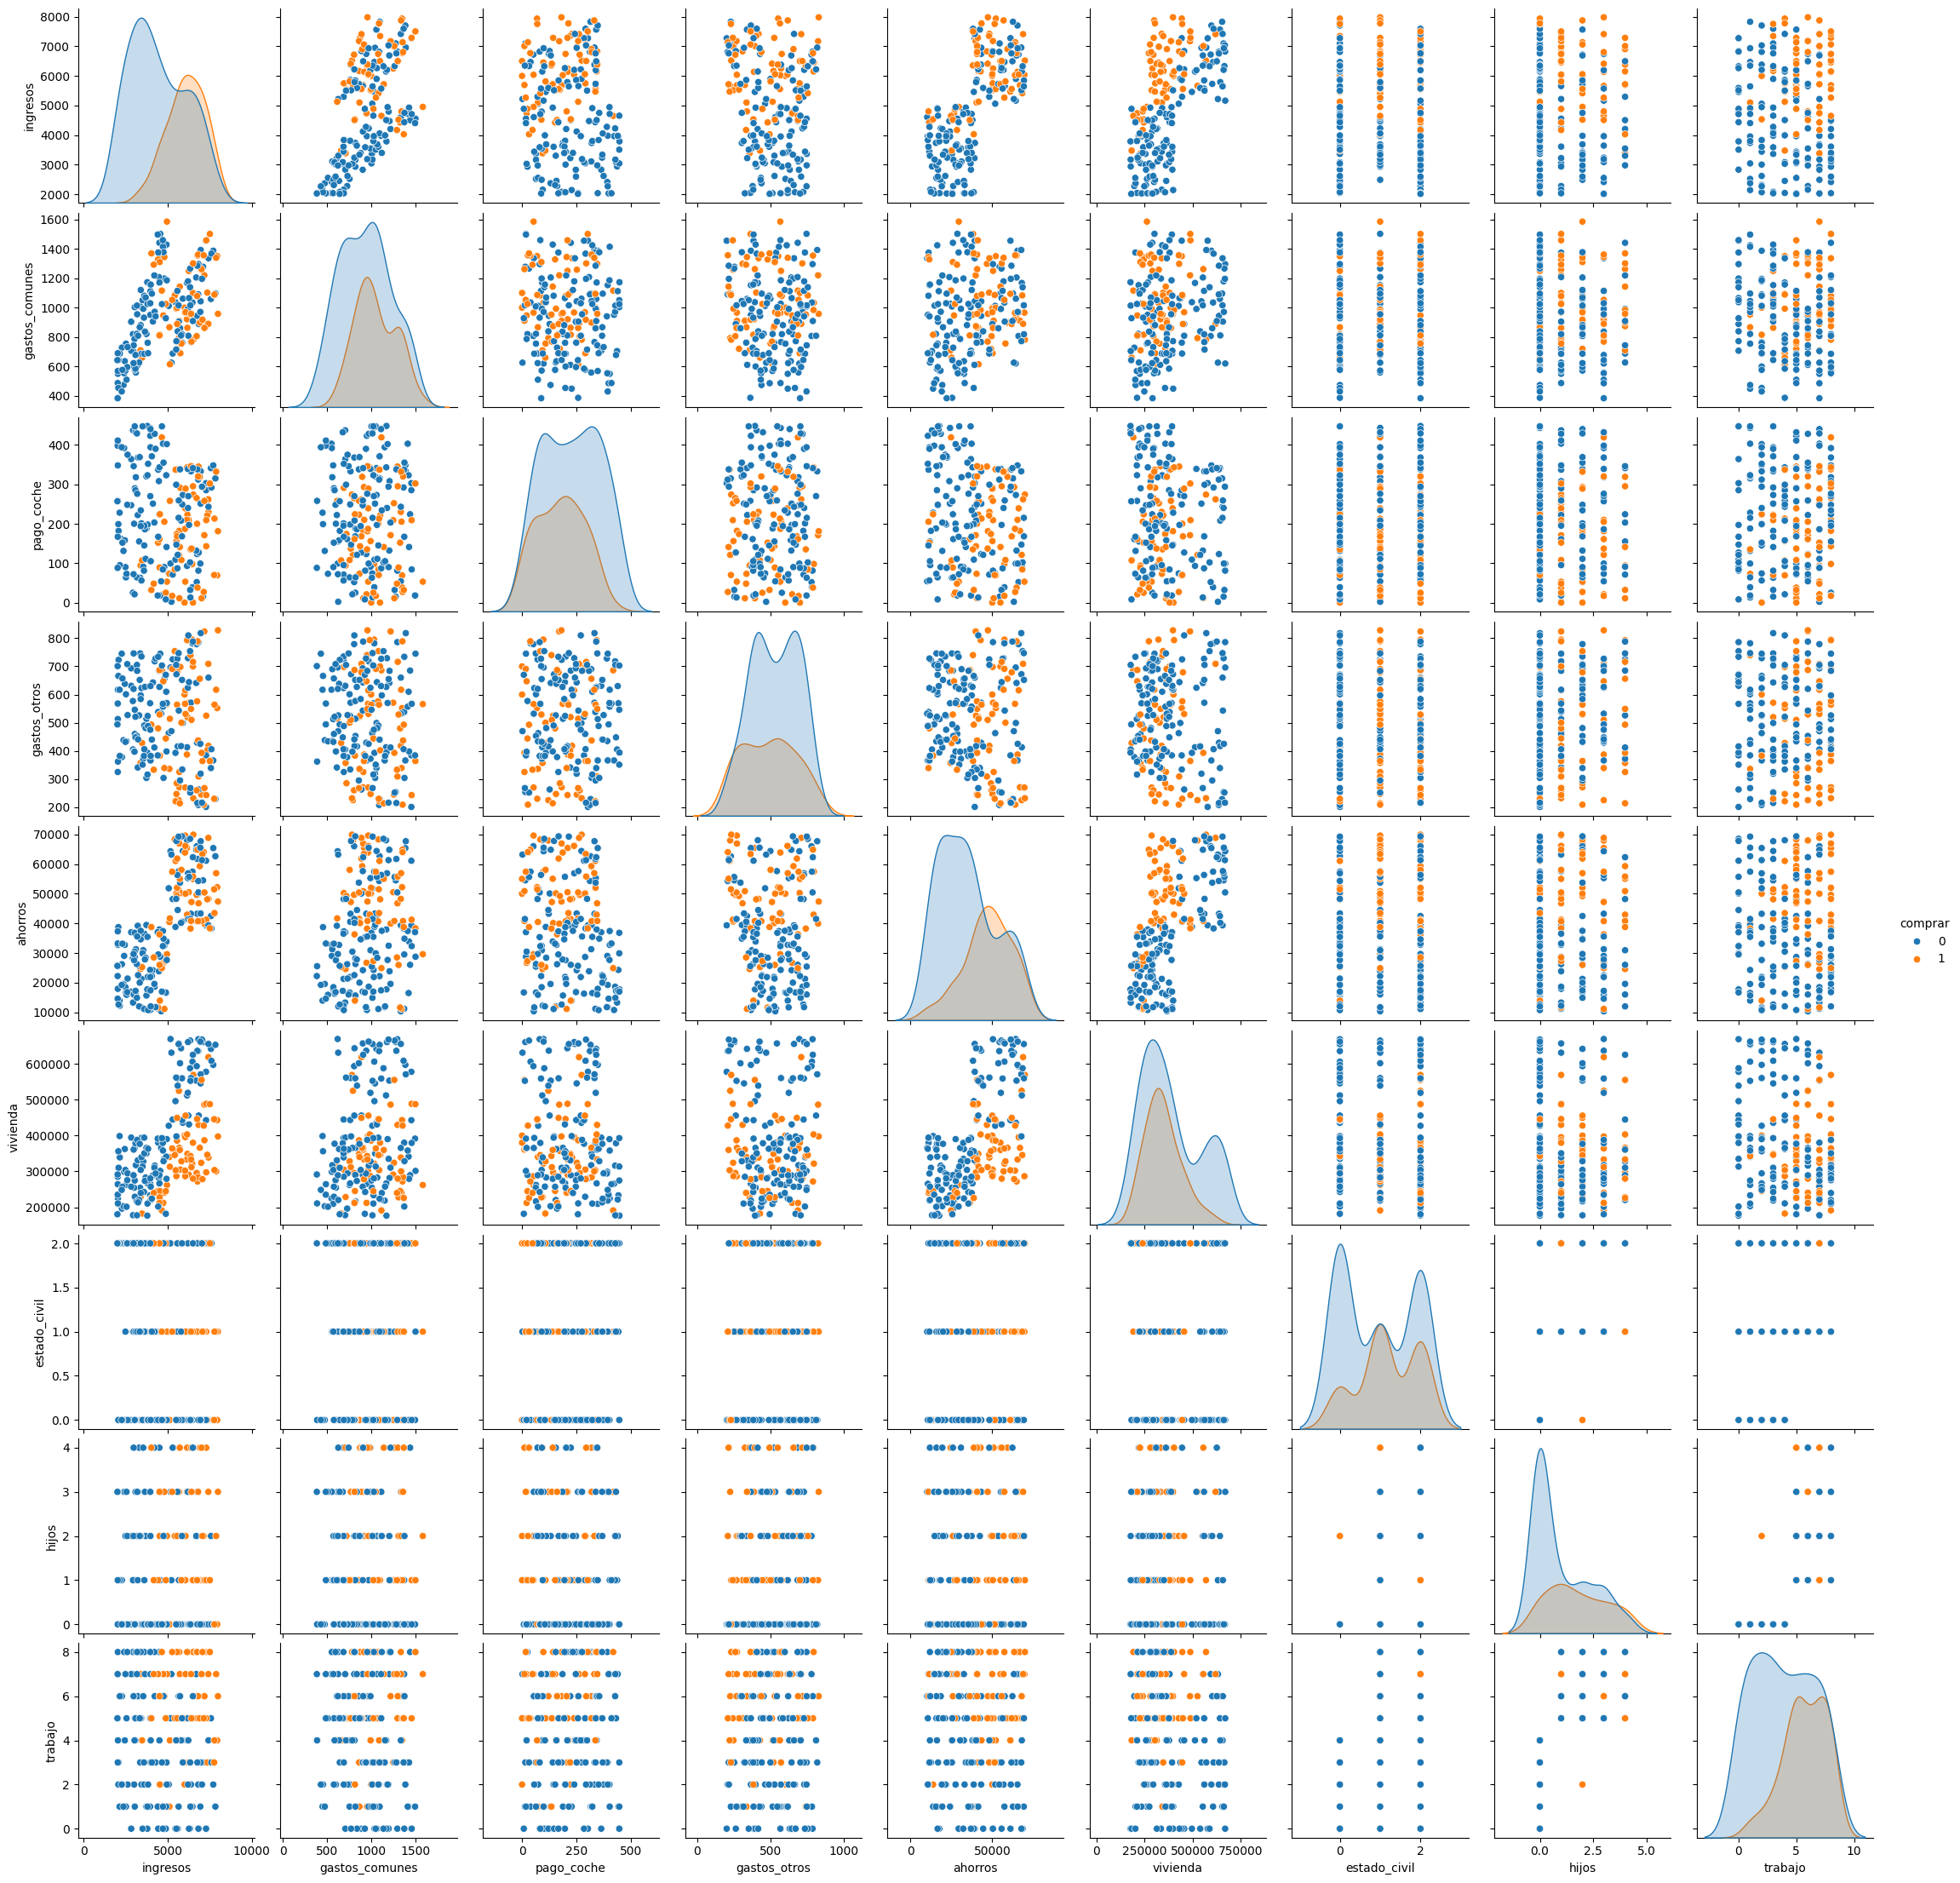

In [19]:
#Representamos los datos gráficamente
sb.pairplot(df, hue='comprar')


# Preprocesamos los datos

Creamos 2 columnas nuevas. En una agrupamos los gastos mensuales. En la otra el monto a financiar para comprar la casa
* Columna 1: gastos=gastos_comunes+gastos_otros+pago_coche
* columna 2: financiar=vivienda-ahorros

Borrar las columnas utilizadas en la suma y la resta

In [20]:
# columna 1
df['gastos'] = df['gastos_comunes'] + df['gastos_otros'] + df['pago_coche']
# columna 2
df['financiar']= df['vivienda'] - df['ahorros']
# borrado de columnas utilizadas en suma y resta
df.drop(['gastos_comunes', 'gastos_otros', 'pago_coche', 'vivienda'], axis=1, inplace=True)

print("\nColumnas tras la ingenieria y borrado",df.columns.tolist())
print(df.describe())


Columnas tras la ingenieria y borrado ['ingresos', 'ahorros', 'estado_civil', 'hijos', 'trabajo', 'comprar', 'gastos', 'financiar']
          ingresos       ahorros  estado_civil       hijos     trabajo  \
count   202.000000    202.000000    202.000000  202.000000  202.000000   
mean   4958.995050  38749.668317      1.024752    1.232673    4.490099   
std    1682.862556  17365.231870      0.837184    1.367833    2.535794   
min    2008.000000  10319.000000      0.000000    0.000000    0.000000   
25%    3513.750000  24964.250000      0.000000    0.000000    2.000000   
50%    4947.500000  38523.000000      1.000000    1.000000    5.000000   
75%    6374.500000  52150.750000      2.000000    2.000000    7.000000   
max    7984.000000  69934.000000      2.000000    4.000000    8.000000   

          comprar       gastos      financiar  
count  202.000000   202.000000     202.000000  
mean     0.331683  1698.752475  334599.970297  
std      0.471988   324.838005  126607.099497  
min     

### Información estadística de los datos

### Veamos la correlación entre columnas

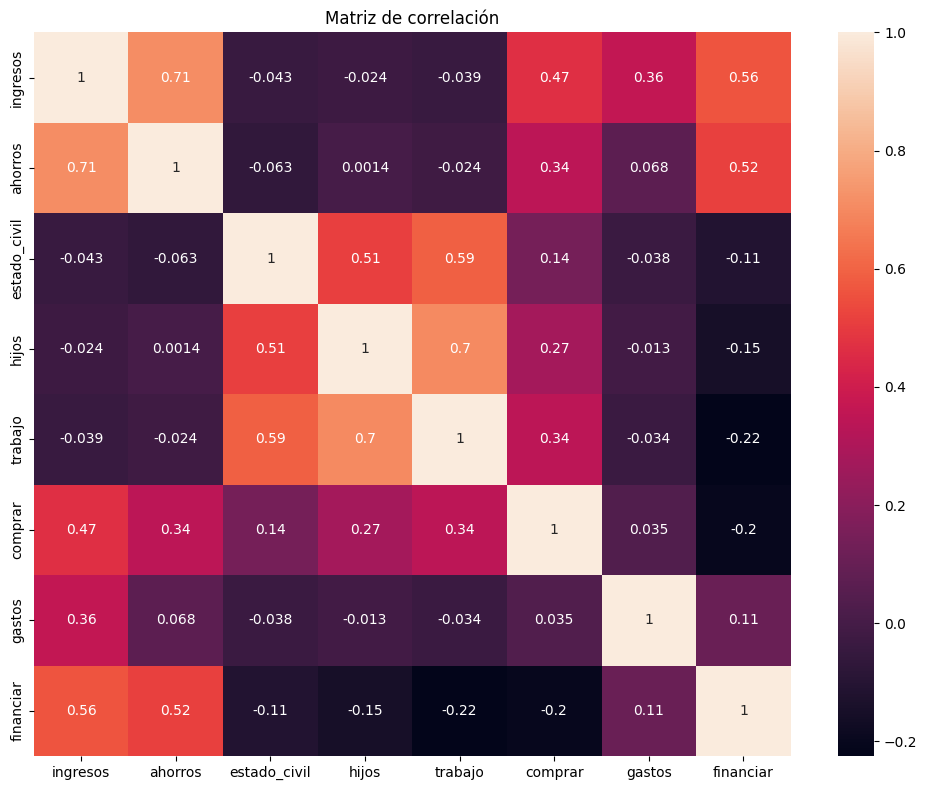

In [21]:
# correlacion
plt.figure(figsize=(10,8))
sb.heatmap(df.corr(), annot=True)
plt.title('Matriz de correlación')
plt.tight_layout()
plt.show()

Vemos que cuantos más ingresos tiene la familia y menor es la cantidad a financiar, mejora la opción de Comprar. De otra manera, convendrá alquilar (rojo)

# Creamos el modelo de Gaussian Naive Bayes

Dividimos en un set de entrenamiento y otro de Test con el 20% de las entradas, entrenar con GaussianNB, score, matriz de confusión y classification_report

In [22]:
#Hacemos una predicción y probabilidad de de cada clase

def evaluar(modelo,X_train, X_test, y_train, y_test, titulo):
  modelo.fit(X_train, y_train)
  y_pred = modelo.predict(X_test)

  print(f"\n--- {titulo} ---")
  print("Accuracy:", modelo.score(X_test, y_test))
  print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
  print("Classification report:\n", classification_report(y_test, y_pred))

  disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=modelo.classes_)
  disp.ax_.set_title(titulo)
  plt.show()

  # ejemplo de probabilidades con la primera muestra del test
  if hasattr(modelo, "predict_proba"):
        proba = modelo.predict_proba(X_test[:1])[0]
        print("Ejemplo predict:", modelo.predict(X_test[:1])[0])
        print("Ejemplo predict_proba [clase0,clase1]:", proba)

  return modelo

Escalamos los datos y dividimos en un set de entrenamiento y otro de Test con el 20% de las entradas, entrenar con GaussianNB, score, matriz de confusión y classification_report. Hacemos una predicción y probabilidad de de cada clase

In [23]:
# GaussianNB (sin escalado)
X = df.drop("comprar", axis=1)
y = df["comprar"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)


--- GaussianNB (StandardScaler) ---
Accuracy: 0.8048780487804879
Confusion matrix:
 [[25  2]
 [ 6  8]]
Classification report:
               precision    recall  f1-score   support

           0       0.81      0.93      0.86        27
           1       0.80      0.57      0.67        14

    accuracy                           0.80        41
   macro avg       0.80      0.75      0.76        41
weighted avg       0.80      0.80      0.80        41



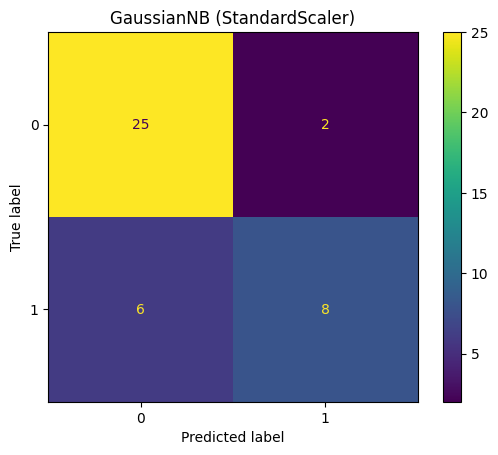

Ejemplo predict: 0
Ejemplo predict_proba [clase0,clase1]: [0.97381694 0.02618306]


In [24]:
# GaussianNB (con StandardScaler)
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

gnb_sc = evaluar(GaussianNB(), X_train_sc, X_test_sc, y_train, y_test, "GaussianNB (StandardScaler)")

Usa la clase SelectKBest de SkLearn para elegir las 5 mejores características. A continuación, dividimos en un set de entrenamiento y otro de Test con el 20% de las entradas, entrenar con GaussianNB, score, matriz de confusión y classification_report. Hacemos una predicción y probabilidad de de cada clase


Top-5 features: ['ingresos', 'ahorros', 'hijos', 'trabajo', 'financiar']

--- GaussianNB (Top-5 SelectKBest) ---
Accuracy: 0.8536585365853658
Confusion matrix:
 [[26  1]
 [ 5  9]]
Classification report:
               precision    recall  f1-score   support

           0       0.84      0.96      0.90        27
           1       0.90      0.64      0.75        14

    accuracy                           0.85        41
   macro avg       0.87      0.80      0.82        41
weighted avg       0.86      0.85      0.85        41



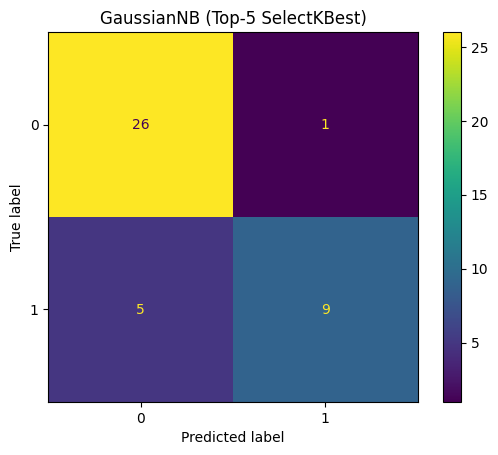

Ejemplo predict: 0
Ejemplo predict_proba [clase0,clase1]: [0.97860783 0.02139217]


In [25]:
selector = SelectKBest(score_func=f_classif, k=5)
X_train_k = selector.fit_transform(X_train, y_train)
X_test_k = selector.transform(X_test)

top_features = X.columns[selector.get_support()]
print("\nTop-5 features:", list(top_features))

gnb_k = evaluar(GaussianNB(), X_train_k, X_test_k, y_train, y_test, "GaussianNB (Top-5 SelectKBest)")

Hacemos lo mismo con Multinomial NB con las 5 mejores columnas y ComplementNB con las 5 mejores columnas



--- MultinomialNB (Top-5 + MinMaxScaler) ---
Accuracy: 0.6585365853658537
Confusion matrix:
 [[27  0]
 [14  0]]
Classification report:
               precision    recall  f1-score   support

           0       0.66      1.00      0.79        27
           1       0.00      0.00      0.00        14

    accuracy                           0.66        41
   macro avg       0.33      0.50      0.40        41
weighted avg       0.43      0.66      0.52        41



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


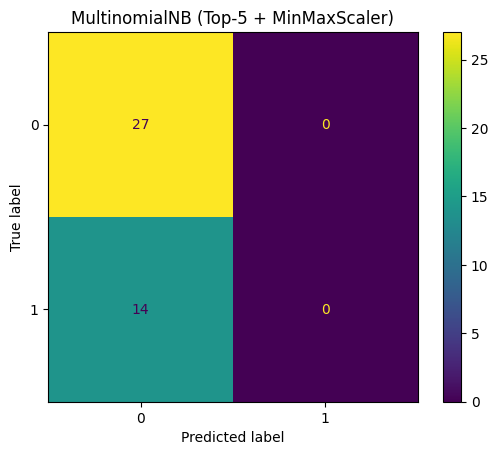

Ejemplo predict: 0
Ejemplo predict_proba [clase0,clase1]: [0.65279125 0.34720875]

--- ComplementNB (Top-5 + MinMaxScaler) ---
Accuracy: 0.6829268292682927
Confusion matrix:
 [[21  6]
 [ 7  7]]
Classification report:
               precision    recall  f1-score   support

           0       0.75      0.78      0.76        27
           1       0.54      0.50      0.52        14

    accuracy                           0.68        41
   macro avg       0.64      0.64      0.64        41
weighted avg       0.68      0.68      0.68        41



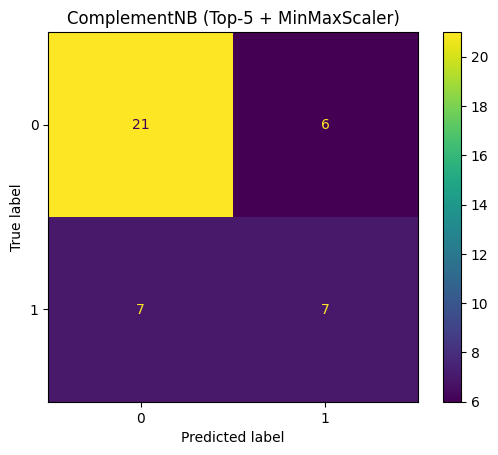

Ejemplo predict: 1
Ejemplo predict_proba [clase0,clase1]: [0.47988384 0.52011616]


In [26]:
# MultinomialNB/ComplementNB
mm = MinMaxScaler()
X_train_k_mm = mm.fit_transform(X_train_k)
X_test_k_mm = mm.transform(X_test_k)

mnb = evaluar(MultinomialNB(), X_train_k_mm, X_test_k_mm, y_train, y_test,
              "MultinomialNB (Top-5 + MinMaxScaler)")

cnb = evaluar(ComplementNB(), X_train_k_mm, X_test_k_mm, y_train, y_test,
              "ComplementNB (Top-5 + MinMaxScaler)")

Naive Bayes no se comporta bien cuando existen	características muy correlacionadas ya que pueden distorsionar los resultados.Ingresos y ahorros lo están según la representación de la matriz de correlación. Vamos a ver si borrando una de ellas obtenemos mejores resultados.
Borramos la columna ahorros


--- GaussianNB (sin 'ahorros') ---
Accuracy: 0.8292682926829268
Confusion matrix:
 [[27  0]
 [ 7  7]]
Classification report:
               precision    recall  f1-score   support

           0       0.79      1.00      0.89        27
           1       1.00      0.50      0.67        14

    accuracy                           0.83        41
   macro avg       0.90      0.75      0.78        41
weighted avg       0.86      0.83      0.81        41



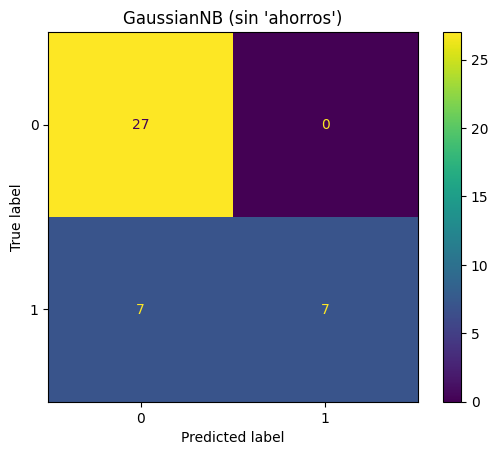

Ejemplo predict: 0
Ejemplo predict_proba [clase0,clase1]: [0.96594061 0.03405939]

--- GaussianNB (sin 'ahorros' + StandardScaler) ---
Accuracy: 0.8780487804878049
Confusion matrix:
 [[26  1]
 [ 4 10]]
Classification report:
               precision    recall  f1-score   support

           0       0.87      0.96      0.91        27
           1       0.91      0.71      0.80        14

    accuracy                           0.88        41
   macro avg       0.89      0.84      0.86        41
weighted avg       0.88      0.88      0.87        41



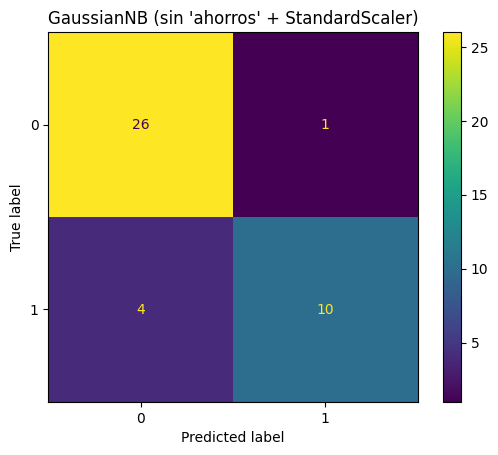

Ejemplo predict: 0
Ejemplo predict_proba [clase0,clase1]: [0.94911047 0.05088953]


In [27]:
# Este paso corresponde a: "Borramos la columna ahorros" para ver si mejora. [file:1]
df_sin_ahorros = df.drop(columns=["ahorros"])

X2 = df_sin_ahorros.drop("comprar", axis=1)
y2 = df_sin_ahorros["comprar"]

X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y2, test_size=0.20, random_state=42, stratify=y2
)

# Puedes repetir el modelo que quieras; por ejemplo GaussianNB sin escalado:
gnb_no_ah = evaluar(GaussianNB(), X2_train, X2_test, y2_train, y2_test,
                    "GaussianNB (sin 'ahorros')")

# Y si quieres también con escalado:
scaler2 = StandardScaler()
X2_train_sc = scaler2.fit_transform(X2_train)
X2_test_sc = scaler2.transform(X2_test)

gnb_no_ah_sc = evaluar(GaussianNB(), X2_train_sc, X2_test_sc, y2_train, y2_test,
                       "GaussianNB (sin 'ahorros' + StandardScaler)")